## 1. 绘制随机漫步图
#### 思路：
1. 随机设置漫步路线散点
2. 在随机散点间移动

#### 可视化实现：    
1. 设置两列散点，供给x，y   
np.random.standard_normal( )    
2. 绘制子图   
plt.subplot(221, axisbg=()), 221表示两行两列第一个图    
axisbg() 设置背景颜色 
3. 依据随机结果绘制散点    
plt.scatter( ) 
4. 给散点连线     
plt.plot( )  
5. 获取当前图像 plt.gca()   
去掉x轴数字 sub.axes.get_xaxis().set_visible(False)   


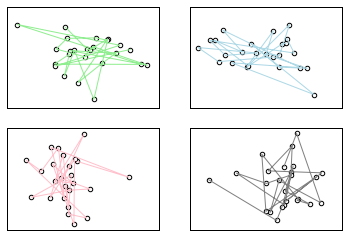

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

data1 = np.random.standard_normal((25, 2))
data2 = np.random.standard_normal((25, 2))
data3 = np.random.standard_normal((25, 2))
data4 = np.random.standard_normal((25, 2))
plt.figure()

plt.subplot(221)
plt.scatter(data1[:,0], data1[:,1], color = '1.0', edgecolor='0.0')
plt.plot(data1[:,0], data1[:,1], color= 'lightgreen')
sub = plt.gca()
sub.axes.get_xaxis().set_visible(False)
sub.axes.get_yaxis().set_visible(False)

plt.subplot(222)
plt.scatter(data2[:,0], data2[:,1], color = '1.0', edgecolor='0.0')
plt.plot(data2[:,0], data2[:,1], color= 'lightblue')
sub = plt.gca()
sub.axes.get_xaxis().set_visible(False)
sub.axes.get_yaxis().set_visible(False)

plt.subplot(223)
plt.scatter(data3[:,0], data3[:,1], color = '1.0', edgecolor='0.0')
plt.plot(data3[:,0], data3[:,1], color= 'pink')
sub = plt.gca()
sub.axes.get_xaxis().set_visible(False)
sub.axes.get_yaxis().set_visible(False)

plt.subplot(224)
plt.scatter(data4[:,0], data4[:,1], color = '1.0', edgecolor='0.0')
plt.plot(data4[:,0], data4[:,1], color= 'grey')
sub = plt.gca()
sub.axes.get_xaxis().set_visible(False)
sub.axes.get_yaxis().set_visible(False)

plt.show()

## 2. 绘制二次函数图像与梯形法解定积分示图
#### 思路：
1. 绘制二次函数图像
2. 绘制梯形，先用 stemline 画梯形截点和底边，再用 plot 连接各点  
(点数少出来的是直线，点数多出来的是曲线)

#### 可视化实现：
1. 用 numpy 的 poly1d 与 linspace 函数初始化 x，y
2. 画二次函数图像 plt.plot( )
3. 画梯形，用 stemline 画梯形底边，用 plot 连接各点
4. 给梯形填色   
换取图像 plt.gca()   
填色 fill_between()   
4. 用 legend 标出函数式，二次函数 $x^2+2x+10$ 在区域 (-10,10) 内的定积分

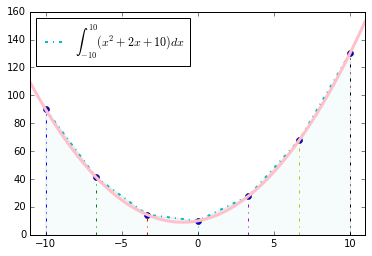

In [112]:
import matplotlib.pyplot as plt
p = np.poly1d( [1, 2, 10]) 
x1 = np.linspace(-11, 11, 100)
x2 = np.linspace(-10, 10, 7)
y1 = p(x1)
y2 = p(x2)

plt.xlim(-11, 11)

#下面这段先画了梯形，再画了二次函数图像
stemline = plt.stem(x2, y2, '-.')
plt.plot(x2, y2, '-.', linewidth=2, color='c')

plt.plot(x1, y1, color='pink', linewidth=3)

ax = plt.gca()
ax.fill_between(x2, y2, where=y2>0, facecolor='lightblue', alpha=0.1)

plt.legend(['$\int_{-10}^{10}(x^2+2x+10)dx$'], loc=2)

plt.show()

## 3. 用ipywidgets.interact绘制函数图像
#### 图形用户界面展示函数图像：
函数还是第二题辣个函数，但正好用ipywidgets.interact来围观一下，变换梯形个数会产生什么效果。
#### 更动部分
1. 把原代码写进一个方程，输入值为一会要变化的数值。这里变化的是梯形个数。
2. 末尾加入interact函数    
interact(make_plot, dot=(3, 10 ,1))    
填入方程，再设置输入值的变化范围，从3到10，间隔为1

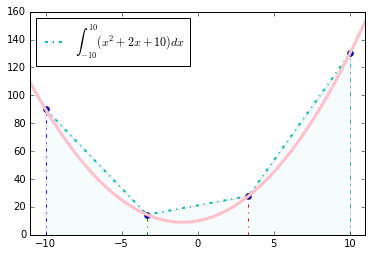

In [110]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def make_plot(dot=7):
    p = np.poly1d( [1, 2, 10]) 
    x1 = np.linspace(-11, 11, 100)
    x2 = np.linspace(-10, 10, dot)
    y1 = p(x1)
    y2 = p(x2)

    plt.xlim(-11, 11)

    stemline = plt.stem(x2, y2, '-.')
    plt.plot(x2, y2, '-.', linewidth=2, color='c')

    plt.plot(x1, y1, color='pink', linewidth=3)

    ax = plt.gca()
    ax.fill_between(x2, y2, where=y2>0, facecolor='lightblue', alpha=0.1)

    plt.legend(['$\int_{-10}^{10}(x^2+2x+10)dx$'], loc=2)
    
interact(make_plot, dot=(3, 10, 1))

## 小练习及笔记
### 绘制地图 : Flights from Edinburgh to Toronto
1.  引入地图包cartopy
2.  获取世界地图   
    ax = plt.axes(projection=ccrs.PlateCarree())    
    ax.stock_img()
3.  设置地点经纬度  
    lon, lat = x, y
4.  在地图上对目标位置连线   
    plt.plot([lon1, lon2], [lat1, lat2], color, linewidth, marker)
5.  标记地点名称及标题    
    plt.text()
    

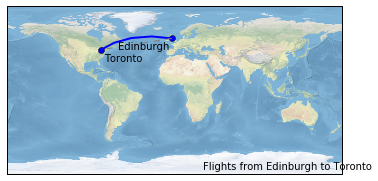

In [116]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

edi_lon, edi_lat = -3.13, 55.57
toronto_lon, toronto_lat = -79.25, 43.40

plt.plot([edi_lon, toronto_lon], [edi_lat, toronto_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([edi_lon, toronto_lon], [edi_lat, toronto_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(edi_lon - 3, edi_lat - 12, 'Edinburgh',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(toronto_lon + 3, toronto_lat - 12, 'Toronto',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.text(30, -85, 'Flights from Edinburgh to Toronto',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

### 画子图
1. figure() 新建画布
2. plt.subplot(234) 两行三列第4个图

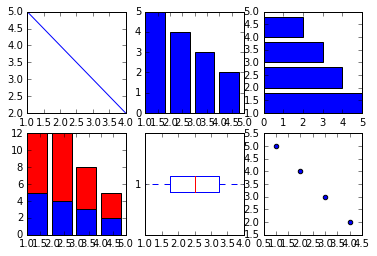

In [117]:
x = [1,2,3,4]
y = [5,4,3,2]
plt.figure()
plt.subplot(231)
plt.plot(x,y)
plt.subplot(232)
plt.bar(x,y)
plt.subplot(233)
plt.barh(x,y)
plt.subplot(234)
plt.bar(x,y)
y1 = [7,8,5,3]
plt.bar(x,y1,bottom=y,color='r')
plt.subplot(235)
plt.boxplot(x, vert=False)
# vert 竖置图片
plt.subplot(236)
plt.scatter(x,y)
plt.show()

### 填充颜色   
ax.fill_between(x, y1, y2, where=y2>=y1, facecolor='darkblue', interpolate=True)

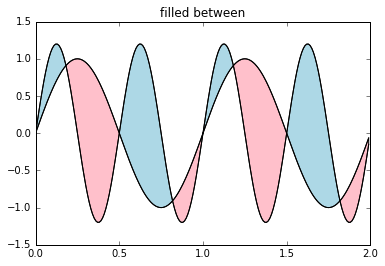

In [118]:
from matplotlib.pyplot import figure, show, gca
import numpy as np
x = np.arange(0.0, 2, 0.01)

y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)
fig = figure()
ax = gca()

ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2>=y1, facecolor='lightblue',
interpolate=True)
ax.fill_between(x, y1, y2, where=y2<=y1, facecolor='pink',
interpolate=True)
ax.set_title('filled between')
show()

### sine & cosine plot

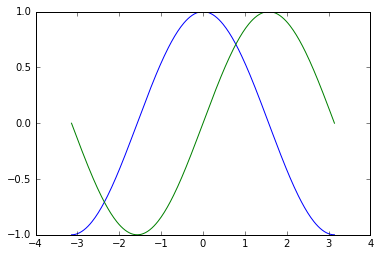

In [119]:
x = np.linspace(-np.pi, np.pi, 256, endpoint= True)
y = np.cos(x)
y1 = np.sin(x)
plt.plot(x,y)
plt.plot(x,y1)
plt.show()

### 设置颜色
Alias Color  
b Blue  
g Green  
r Red  
c Cyan  
m Magenta   
y Yellow  
k Black  
w White  

In [ ]:
plt.subplot(111, axisbg=(0.0843, 0.4098, 0.3098))
plt.plot(x)
plt.title('Title', color='#954346')
plt.show()

###  ※ ipywidgets.interact交互功能列表



| keyword argument    | widget           | 
| ------------------- |:----------------:| 
| True or False       | 复选框         |
| 'Hi there'          | 文本框             | 
| value or (min,max) or (min,max,step) if integers are passed | 数字滑块    |
|value or (min,max) or (min,max,step) if floats are passed | 字符滑块|
| ('orange','apple') or {'one':1,'two':2} |下拉菜单  |

In [148]:
def slow_function(i):
    print(int(i),list(x for x in range(int(i)) if
                str(x)==str(x)[::-1] and
                str(x**2)==str(x**2)[::-1]))
    return
interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5),__manual=True)

<function __main__.slow_function>